In [24]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np

#Para decodificar las imagenes
from PIL import Image
from io import BytesIO

In [25]:
# ALERTA, este chunk es para que me funcione selenium con vivaldi en mi ordenador,
#igual interesa usar chrome (como en clase)
options = Options()
options.add_argument("start-maximized")
options.binary_location=r'C:\Users\morte\AppData\Local\Vivaldi\Application\vivaldi.exe'
driver = webdriver.Chrome(executable_path=r'C:\Users\morte\OneDrive\Documents\DataScience\AnaliticaWeb\SeleniumCrome98\chromedriver.exe', options=options)

<ipython-input-25-a7b63e05c613>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'C:\Users\morte\OneDrive\Documents\DataScience\AnaliticaWeb\SeleniumCrome98\chromedriver.exe', options=options)


In [27]:
url = "https://commons.wikimedia.org/wiki/Category:Iberian_letters"
driver.get(url)
nombres = driver.find_elements(By.XPATH,'//a[@class="image"]/img')
# sacamos los elementos que contienen las url de las imágenes de la web de wikicomons Iberian_letters

In [79]:
def download_sign(url):#cosa tocha que importa las páginas con licencia abierta desde wikimedia y las pasa a matriz
    response = requests.get(url_im)
    img = Image.open(BytesIO(response.content))
    
    signe = np.array(img)[:,:,1]
    output = np.zeros([120,120])
    
    x,y = signe.shape
    
    output[60-int(x/2):60-int(x/2)+x,60-int(y/2):60-int(y/2)+y] = signe#las fotos están en diferentes tamaños,
    #esto las pone centradas en un marco igual para todas
    
    return output

signarium = np.zeros([120,120,140])
defectes = 0

for i in range(len(nombres)):#recorremos las url, descargamos y guardamos centradas en una matriz
    url_im = nombres[i].get_attribute("src")#atributo con la fuente de la imagen en png
    print(url_im)
    
    signarium[:,:,i-defectes] = download_sign(url_im)/255
    
    if np.max(signarium[:,:,i-defectes]) == 0:#resulta que hay 2 imágenes que las baja en negro, esto las elimina
        defectes = defectes +1#cada vez que haya una imagen defectuosa retrasamos el contador para que se sobreescriba
        
signarium = signarium[:,:,:len(nombres)-defectes]#nos quedan las capas defectuosas al final, las quitamos
signarium.shape

https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Iberian_Sampi.svg/97px-Iberian_Sampi.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/NE_Iberian_a1a.svg/61px-NE_Iberian_a1a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/NE_Iberian_a1b.svg/61px-NE_Iberian_a1b.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/NE_Iberian_a1c.svg/65px-NE_Iberian_a1c.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/NE_Iberian_a2a.svg/75px-NE_Iberian_a2a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/NE_Iberian_a2b.svg/72px-NE_Iberian_a2b.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/NE_Iberian_a3.svg/59px-NE_Iberian_a3.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/NE_Iberian_a5a.svg/63px-NE_Iberian_a5a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/NE_Iberian_a5b.svg/59px-NE_Iberian_a5b.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/N

https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/NE_Iberian_pun2.svg/36px-NE_Iberian_pun2.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/NE_Iberian_pun3.svg/36px-NE_Iberian_pun3.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/NE_Iberian_r1a.svg/75px-NE_Iberian_r1a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/NE_Iberian_r1b.svg/75px-NE_Iberian_r1b.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/NE_Iberian_r2a.svg/61px-NE_Iberian_r2a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/NE_Iberian_r2b.svg/65px-NE_Iberian_r2b.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/NE_Iberian_r3.svg/70px-NE_Iberian_r3.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/NE_Iberian_r5.svg/70px-NE_Iberian_r5.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/NE_Iberian_s10a.svg/47px-NE_Iberian_s10a.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/

(120, 120, 138)

<ipython-input-80-25f9a6690f8d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


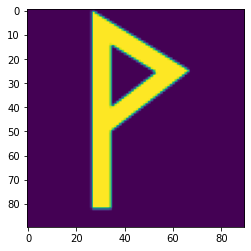

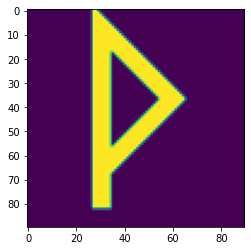

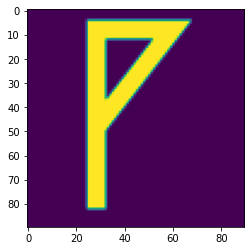

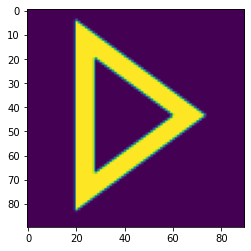

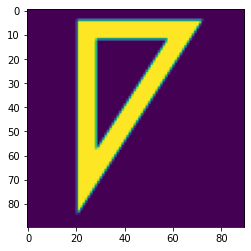

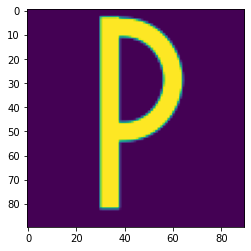

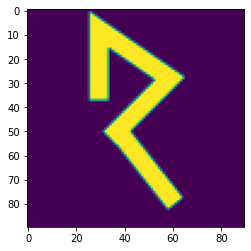

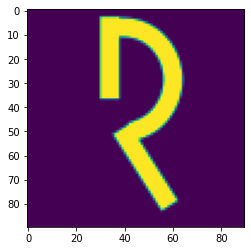

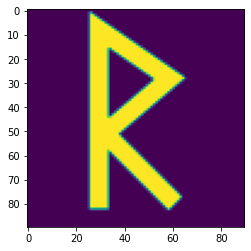

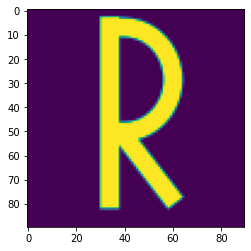

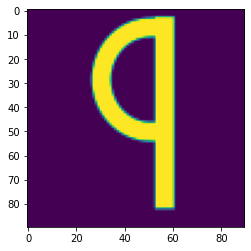

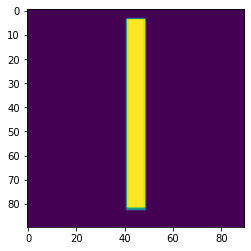

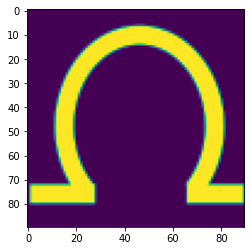

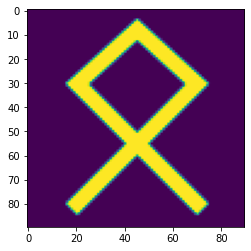

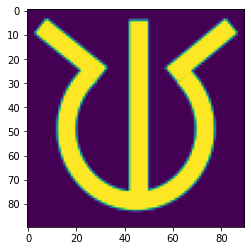

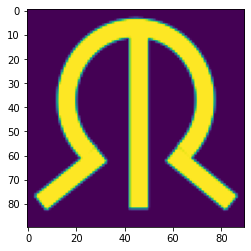

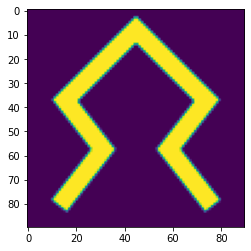

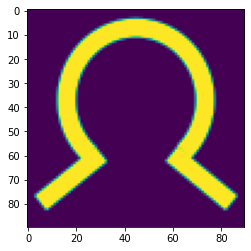

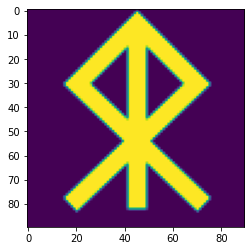

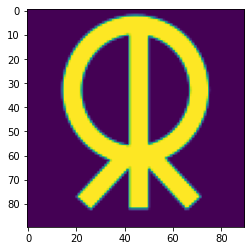

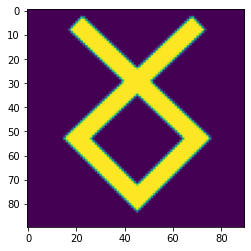

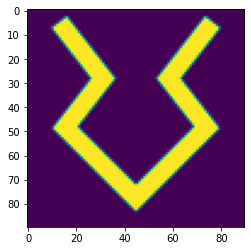

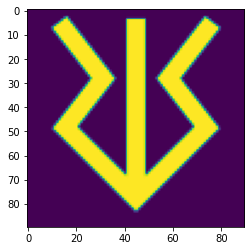

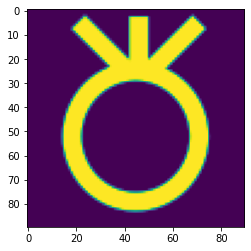

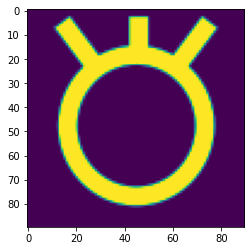

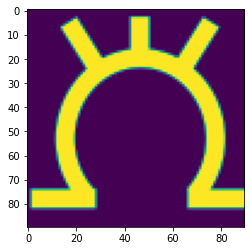

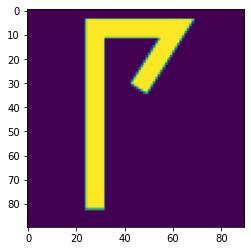

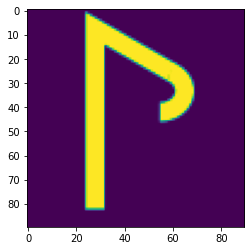

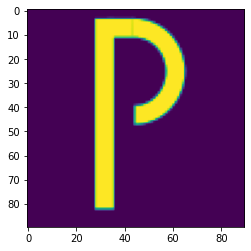

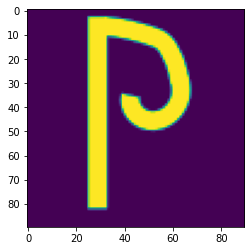

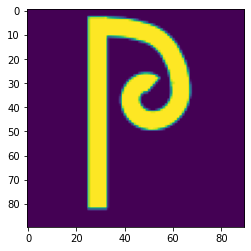

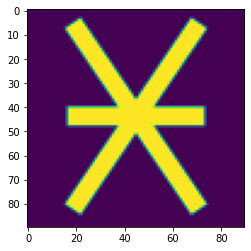

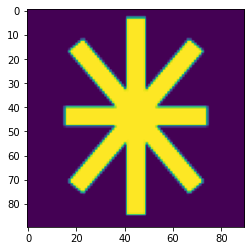

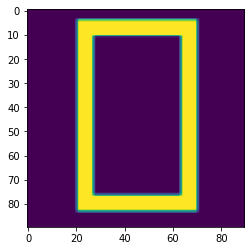

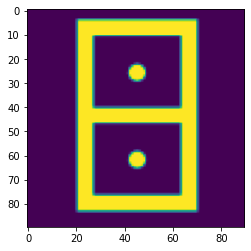

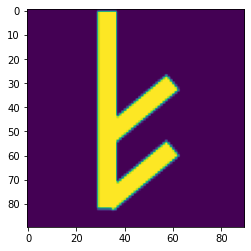

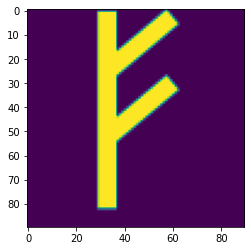

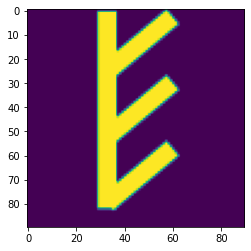

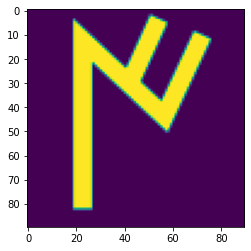

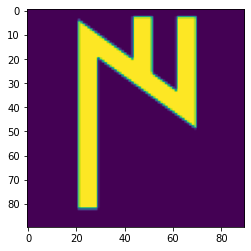

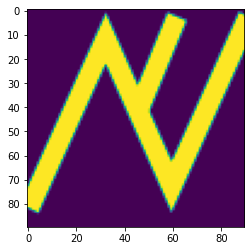

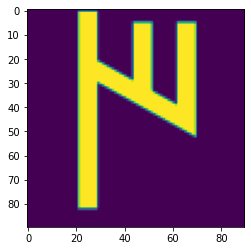

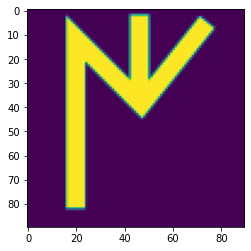

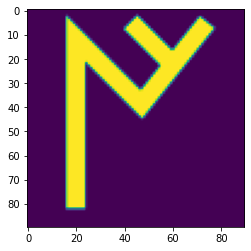

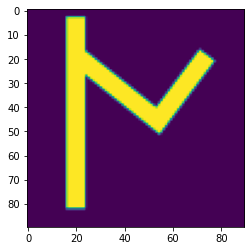

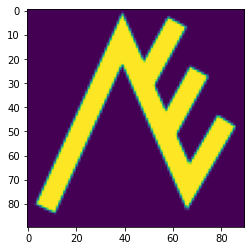

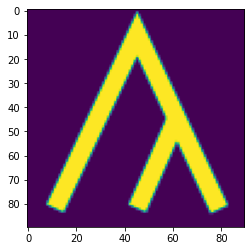

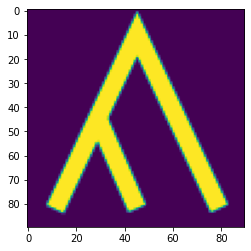

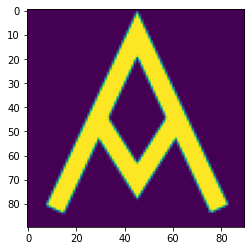

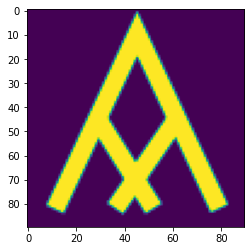

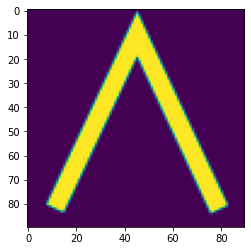

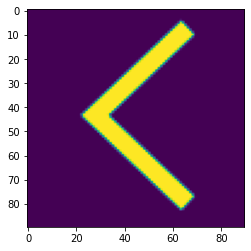

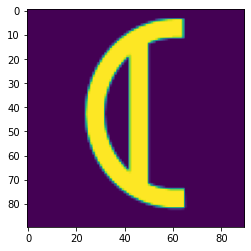

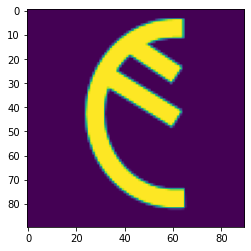

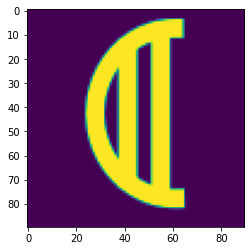

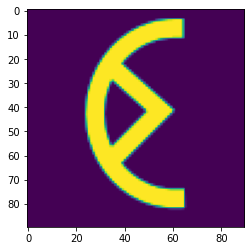

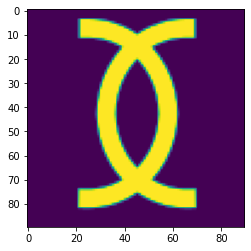

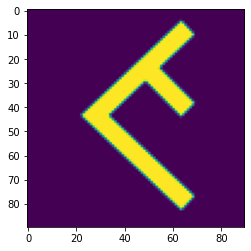

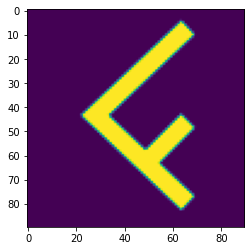

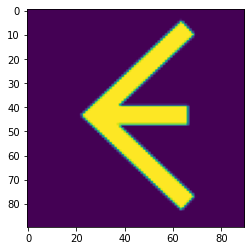

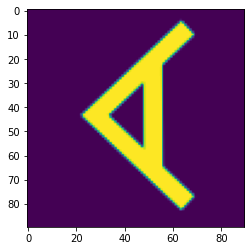

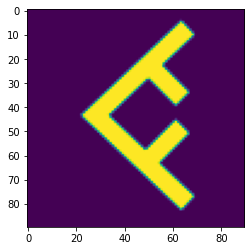

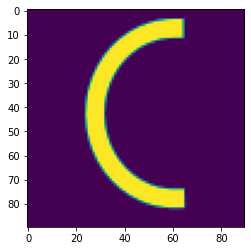

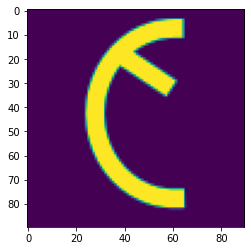

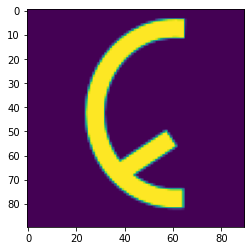

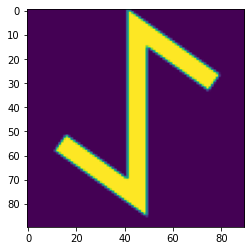

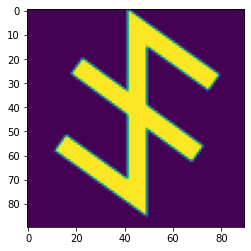

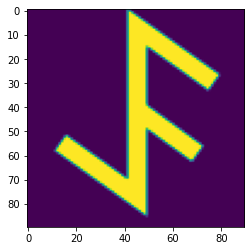

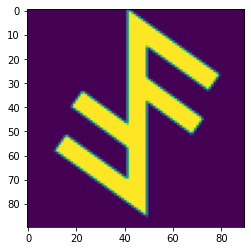

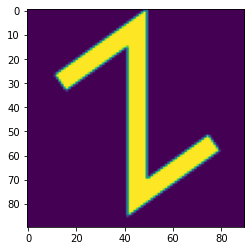

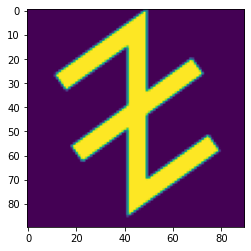

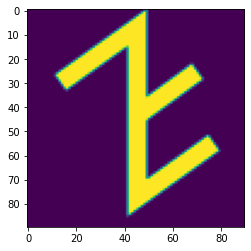

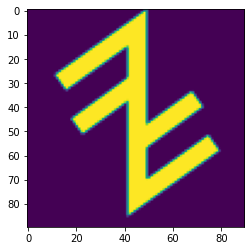

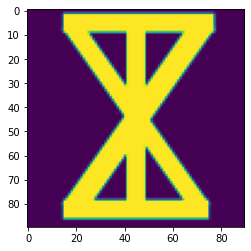

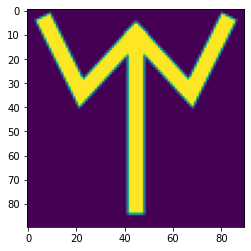

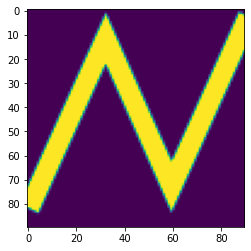

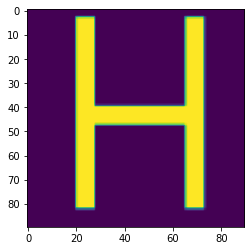

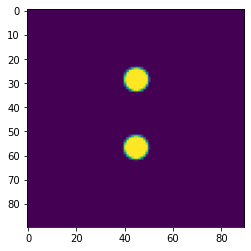

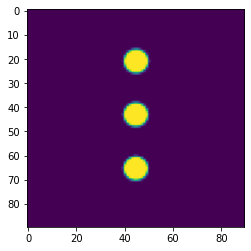

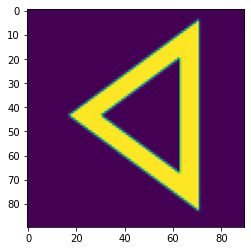

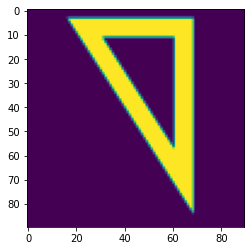

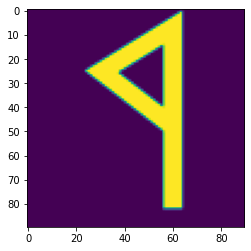

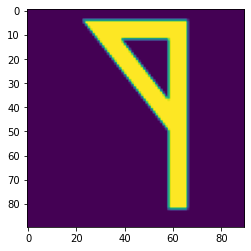

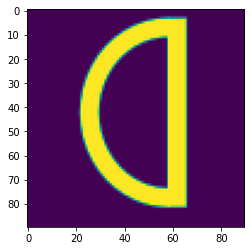

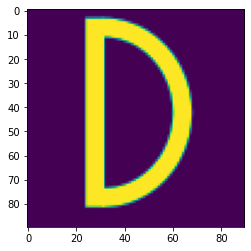

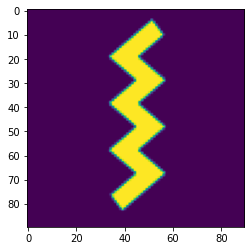

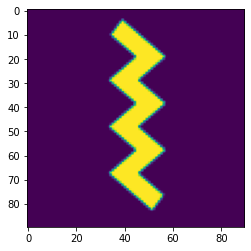

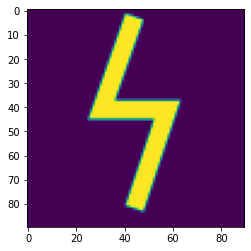

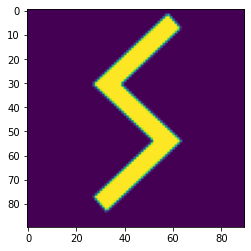

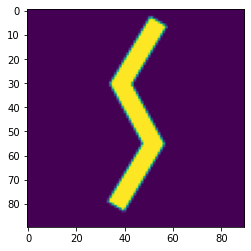

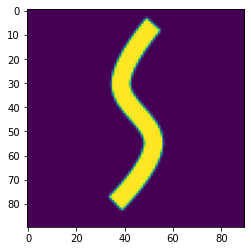

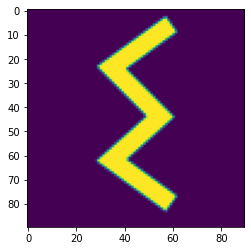

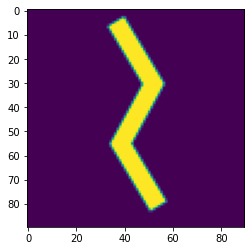

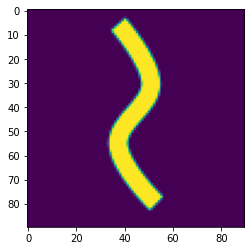

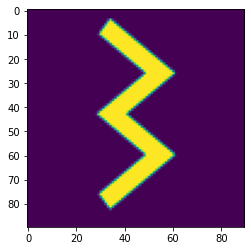

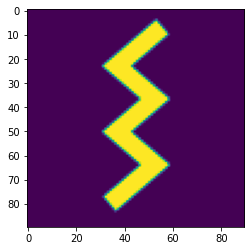

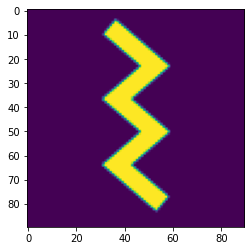

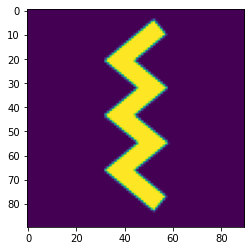

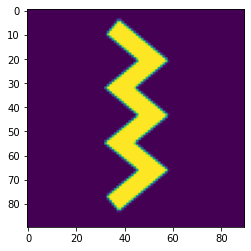

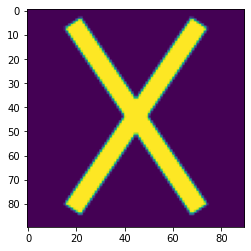

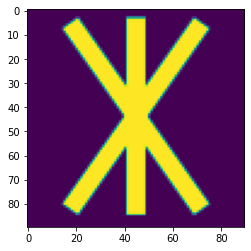

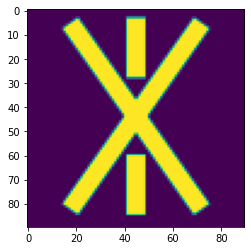

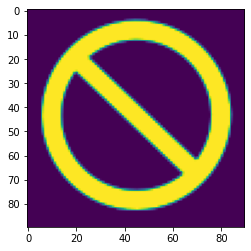

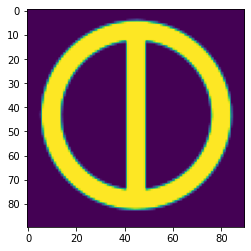

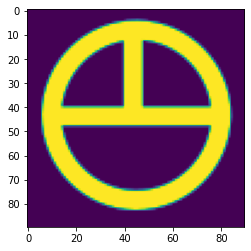

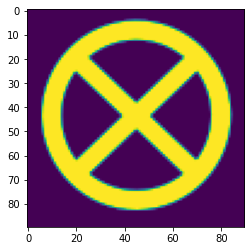

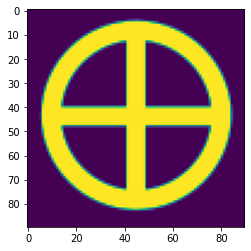

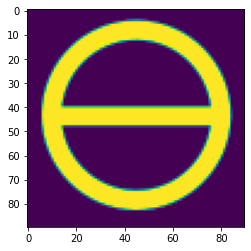

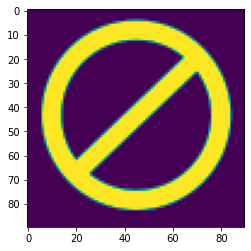

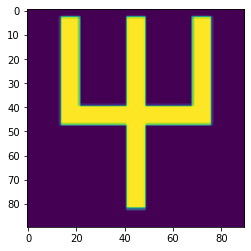

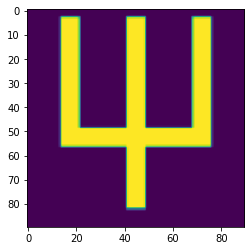

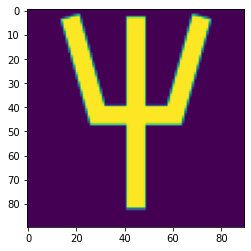

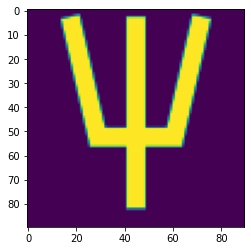

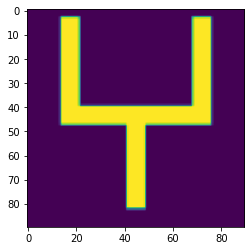

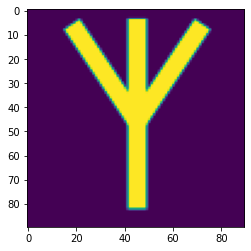

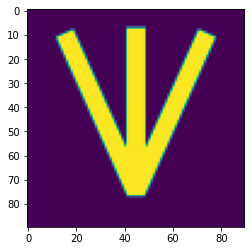

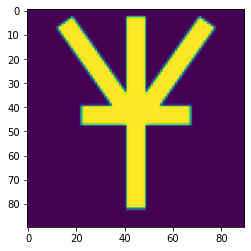

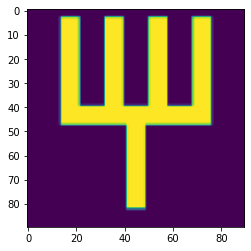

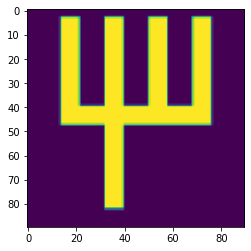

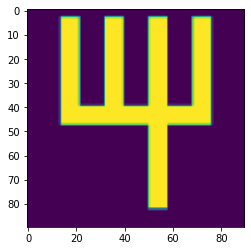

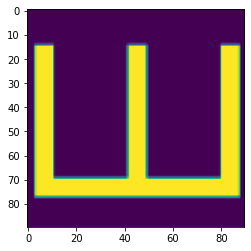

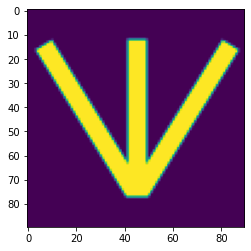

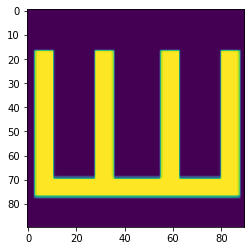

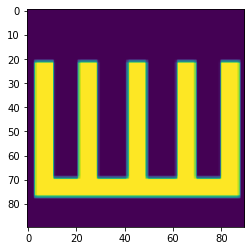

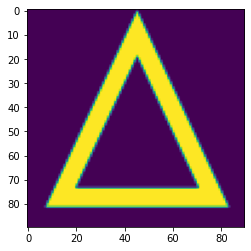

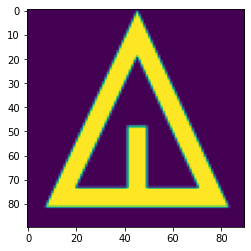

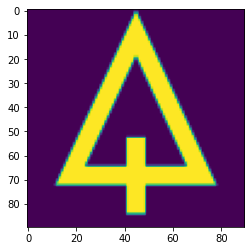

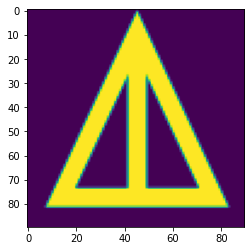

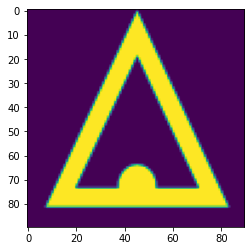

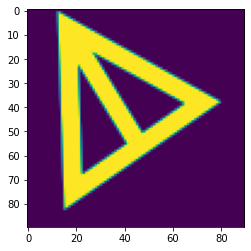

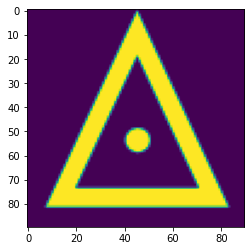

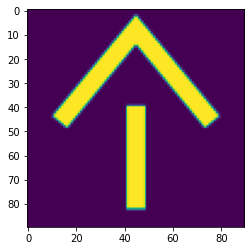

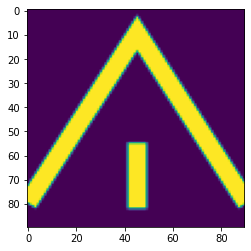

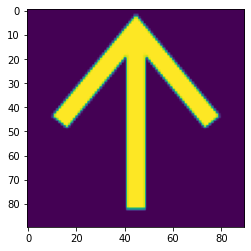

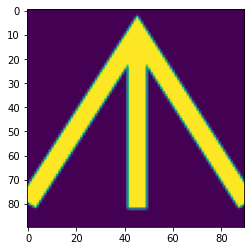

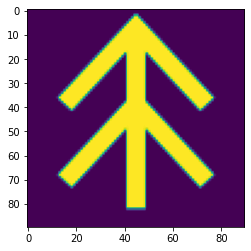

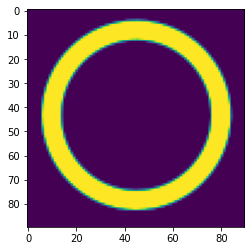

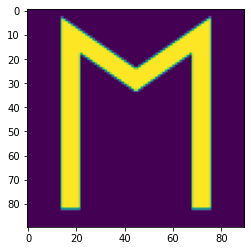

In [80]:
cut_signarium = signarium[15:105,15:105,:]
#reducimos un poco el tamaño cortando bordes, igual nos toca reescalar las imágenes para hacerlas más pequeñas

#Comprobamos que todas estan bien
a,b,c = cut_signarium.shape

for i in range(c):
    plt.figure()
    plt.imshow(cut_signarium[:,:,i])
    plt.show

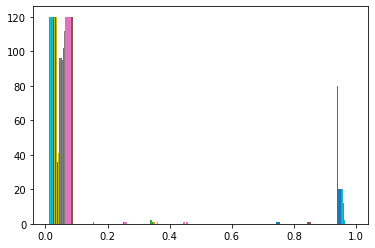

In [85]:
plt.hist(signarium[:,:,1])# esto igual toca procesarlo un poco más y hacer las imágenes binarias (solo 0 y 1)
np.save("SgnariumProcesado",cut_signarium)